In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Exploring high dimensional data


In [2]:
pokemon_df = pd.read_csv('pokemon.csv')
pokemon_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Removing features without variance

In [3]:
# Leave this list as is
number_cols = ['HP', 'Attack', 'Defense']

# Remove the feature without variance from this list
non_number_cols = ['Name', 'Type 1']

# Create a new dataframe by subselecting the chosen features
df_selected = pokemon_df[number_cols + non_number_cols]

# Prints the first 5 lines of the new dataframe
df_selected.head()

,HP,Attack,Defense,Name,Type 1
0,45,49,49,Bulbasaur,Grass
1,60,62,63,Ivysaur,Grass
2,80,82,83,Venusaur,Grass
3,80,100,123,VenusaurMega Venusaur,Grass
4,39,52,43,Charmander,Fire


### Visually detecting redundant features

In [4]:
female = pd.read_csv('ANSUR_II_FEMALE.csv')
male = pd.read_csv('ANSUR_II_MALE.csv') 
ansur_df = pd.concat([female, male])
ansur_df['body_height'] = ansur_df['stature_m']
ansur_df['n_legs'] = 2
ansur_df_1 = ansur_df[['Gender', 'weight_kg', 'stature_m', 'body_height']]
ansur_df_2 = ansur_df[['Gender', 'footlength', 'headlength', 'n_legs']]

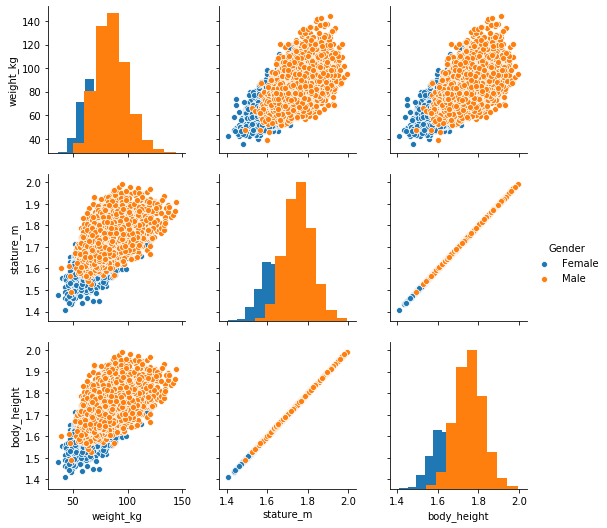

In [5]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

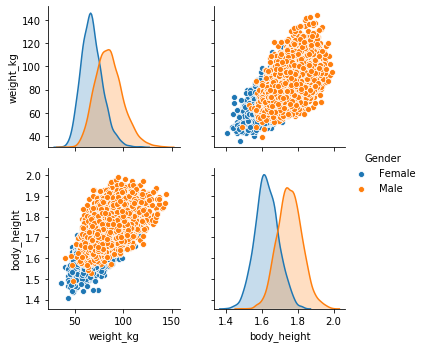

In [6]:
# Remove one of the redundant features
reduced_df = ansur_df_1.drop('stature_m', axis = 1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

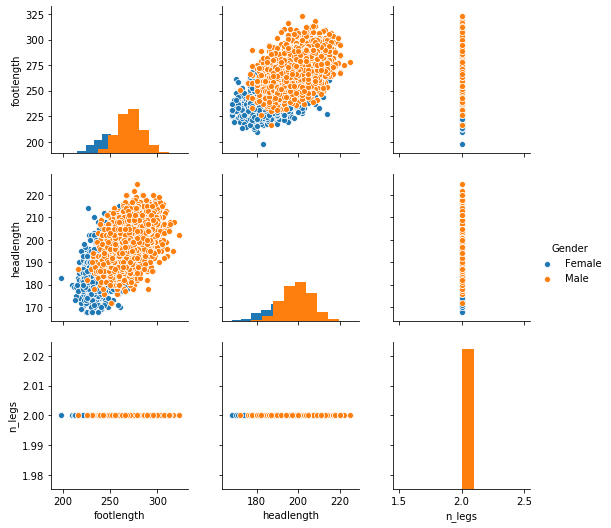

In [7]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')

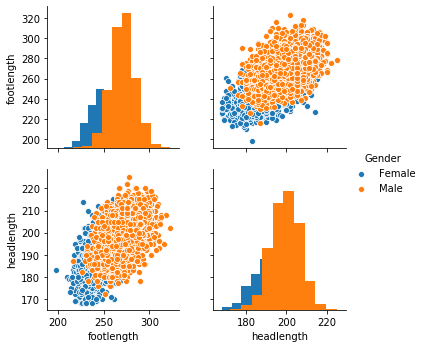

In [8]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop('n_legs', axis = 1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

### Fitting t-SNE to the ANSUR data

In [9]:
from sklearn.manifold import TSNE

In [10]:
ansur_df = ansur_df[['Branch', 'Component', 'Gender', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference',
       'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength',
       'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting',
       'iliocristaleheight', 'interpupillarybreadth', 'interscyei', 'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight',
       'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference', 'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength',
       'shouldercircumference', 'shoulderelbowlength', 'shoulderlength', 'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight',
       'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight', 'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth',
       'waistcircumference', 'waistdepth', 'waistfrontlengthsitting', 'waistheightomphalion', 'wristcircumference', 'wristheight']]

In [11]:
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = ansur_df.drop(non_numeric, axis=1)

# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate = 50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features)

[[-19.433306   -46.292988  ]
 [  6.179881   -34.789837  ]
 [ -3.4216228  -26.620113  ]
 ...
 [ -0.30645385  -7.851392  ]
 [ 26.508575    -4.778877  ]
 [  3.627816    42.9599    ]]


### t-SNE visualisation of dimensionality

In [12]:
tsne = pd.DataFrame(tsne_features, columns = ['x', 'y'])
df = ansur_df.join(tsne)

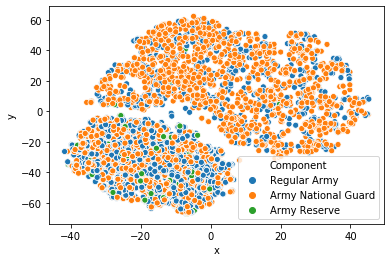

In [13]:
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", hue='Component', data=df)

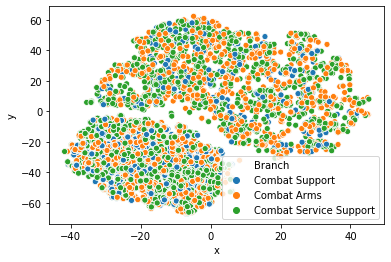

In [14]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df)

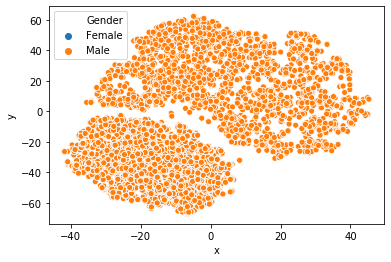

In [15]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df)

## Feature selection I, selecting for feature information